#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
df.duplicated().any()

True

Periksa apakah ada missing values

In [4]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

Periksa outlier dengan boxplot untuk setiap kolom feature

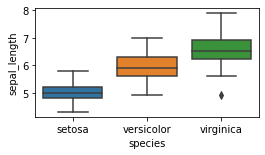

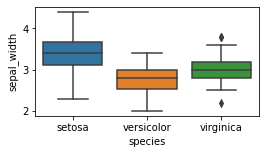

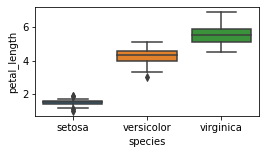

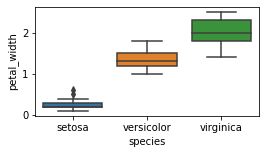

In [5]:
plt.figure(figsize=(4,2))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.show()
plt.figure(figsize=(4,2))
sns.boxplot(x='species', y='sepal_width', data=df)
plt.show()
plt.figure(figsize=(4,2))
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()
plt.figure(figsize=(4,2))
sns.boxplot(x='species', y='petal_width', data=df)
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [6]:
# Independent Variabel
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Dependent Variabel
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [9]:
klasifikasi = LogisticRegression(random_state = 0)
klasifikasi.fit(X_train, y_train)

LogisticRegression(random_state=0)

Uji model dengan dataset test

In [10]:
y_pred = klasifikasi.predict(X_test)
print(y_pred)

['versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica']


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[1 0 0]
 [0 6 0]
 [0 1 7]]
Accuracy Score:  0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [12]:
klasifikasi2 = GaussianNB()
klasifikasi2.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [13]:
y_pred = klasifikasi2.predict(X_test)
print(y_pred)

['versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [14]:
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm2)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[1 0 0]
 [0 6 0]
 [0 1 7]]
Accuracy Score:  0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [15]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Uji model dengan data test

In [16]:
y_pred = classifier.predict(X_test)
print(y_pred)

['versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica']


Ukur akurasi dari model K-Nearest Neighbor

In [17]:
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm3)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[1 0 0]
 [0 6 0]
 [0 1 7]]
Accuracy Score:  0.9333333333333333


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [18]:
#Dengan menggunakan 3 model klasifikasi yaitu Logistic Regression, Naive Bayes, K-Nearest Neighbor memiliki akurasi skor yang sama